### NLP vs Text Mining
- NLP : 인간의 언어를 이해하는데 집중된 학문(음성인식, AI비서, 챗봇)
- Text Mining : 비정형 텍스트데이터에서 의미 있는 정보를 추출하는 학문

### Text Mining 종류
- 텍스트 분류 : 텍스트가 속하는 카테고리를 분류하는 분석
- 감성분석 : 텍스트에서 나타나는 감정/기분/의견 등을 분석
- 텍스트 요약 : 텍스트에서 중요한 주제를 나타내는 키워드,문장 등을 추출/생성
- 텍스트 군집화와 유사도측정 : 텍스트의 비슷한 정도를 측정하고 그룹핑하는 분석

### 텍스트 분석 프로세스
1. 텍스트 전처리
    - 클렌징(대/소문자 변경, 특수문자 삭제)
    - 토큰화 : 텍스트를 잘게 쪼개는 작업
    - stop word(불용어) 제거
    - 어근추출(Stemming/Lemmatization)
        - 영어 : nltk
        - 한국어 : Konlpy(형태소분석기)
2. 피처 벡터화/추출 : 정형화 작업, 글자에서 정해진 알고리즘에 따라 숫자로 변경
    - 단순 언어 빈도
    - BOW(Bag of Word)
    - tf-idf
    - word embedding(워드임베딩)
    - BPE(바이트페어인코딩)
3. ML 학습/예측/평가

### 데이터 로딩

In [1]:
import pandas as pd
pd.set_option("display.max_colwidth",100) # 컬럼의 너비를 조정해서 긴 리뷰를 볼 수 있게

In [2]:
train =  pd.read_csv("./data/ratings_train.txt", delimiter="\t")
test = pd.read_csv("./data/ratings_test.txt", delimiter="\t")

In [3]:
display("Train data")
display(train.head())
display("Test data")
display(test.head())

'Train data'

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다,1


'Test data'

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


#### 결측치 확인

In [4]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


None

#### 결측치 데이터 삭제

In [5]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [6]:
train.shape, test.shape

((149995, 3), (49997, 3))

### 텍스트 분석시 사용하는 단어
- 말뭉치(corpus) : 텍스트분석을 위해 모은 데이터셋
- 문서(document) : 말뭉치 안에 텍스트를 지칭하는 단위

### 단어빈도 분석
- 워드카운트 : 단어의 등장 빈도를 측정하는 알고리즘

In [7]:
text_train = train['document']

In [25]:
# 토큰화 작업
# 띄어쓰기 단위로 모든 문장을 쪼개서 리스트에 넣어보자.
tmp = [doc.split(" ") for doc in text_train]

In [27]:
token_list = []
for t in tmp :
    token_list += t

In [28]:
token_list

['아',
 '더빙..',
 '진짜',
 '짜증나네요',
 '목소리',
 '흠...포스터보고',
 '초딩영화줄....오버연기조차',
 '가볍지',
 '않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소',
 '이야기구먼',
 '..솔직히',
 '재미는',
 '없다..평점',
 '조정',
 '사이몬페그의',
 '익살스런',
 '연기가',
 '돋보였던',
 '영화!스파이더맨에서',
 '늙어보이기만',
 '했던',
 '커스틴',
 '던스트가',
 '너무나도',
 '이뻐보였다',
 '막',
 '걸음마',
 '뗀',
 '3세부터',
 '초등학교',
 '1학년생인',
 '8살용영화.ㅋㅋㅋ...별반개도',
 '아까움.',
 '원작의',
 '긴장감을',
 '제대로',
 '살려내지못했다.',
 '별',
 '반개도',
 '아깝다',
 '욕나온다',
 '이응경',
 '길용우',
 '연기생활이몇년인지..정말',
 '발로해도',
 '그것보단',
 '낫겟다',
 '납치.감금만반복반복..이드라마는',
 '가족도없다',
 '연기못하는사람만모엿네',
 '액션이',
 '없는데도',
 '재미',
 '있는',
 '몇안되는',
 '영화',
 '왜케',
 '평점이',
 '낮은건데?',
 '꽤',
 '볼만한데..',
 '헐리우드식',
 '화려함에만',
 '너무',
 '길들여져',
 '있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다',
 '눈물나서',
 '죽겠다90년대의',
 '향수자극!!허진호는',
 '감성절제멜로의',
 '달인이다~',
 '울면서',
 '손들고',
 '횡단보도',
 '건널때',
 '뛰쳐나올뻔',
 '이범수',
 '연기',
 '드럽게못해',
 '담백하고',
 '깔끔해서',
 '좋다.',
 '신문기사로만',
 '보다',
 '보면',
 '자꾸',
 '잊어버린다.',
 '그들도',
 '사람이었다는',
 '것을.',
 '취향은',
 '존중한다지만',
 '진짜',
 '내생에',
 '극장에서',
 '본',
 '영화중',
 '가장',
 '노잼',
 '노감동임',
 '스토리도'

#### 토큰화 ver2

In [32]:
token_list = [t for doc in text_train for t in doc.split(" ")]

#### Counter 활용 단어빈도 측정

In [29]:
from collections import Counter

In [30]:
counter = Counter(token_list)

In [31]:
counter.most_common(40)

[('영화', 10825),
 ('너무', 8239),
 ('정말', 7791),
 ('진짜', 5929),
 ('이', 5059),
 ('영화.', 3598),
 ('왜', 3285),
 ('더', 3260),
 ('이런', 3249),
 ('그냥', 3237),
 ('수', 2945),
 ('영화를', 2759),
 ('잘', 2644),
 ('다', 2615),
 ('보고', 2557),
 ('좀', 2449),
 ('영화는', 2426),
 ('그', 2421),
 ('영화가', 2418),
 ('본', 2298),
 ('최고의', 2219),
 ('ㅋㅋ', 2019),
 ('내가', 2000),
 ('없는', 1957),
 ('이건', 1889),
 ('이렇게', 1828),
 ('완전', 1780),
 ('평점', 1760),
 ('봤는데', 1746),
 ('있는', 1739),
 ('좋은', 1726),
 ('이거', 1710),
 ('이게', 1676),
 ('보는', 1600),
 ('평점이', 1595),
 ('내', 1595),
 ('다시', 1583),
 ('그리고', 1547),
 ('참', 1508),
 ('많이', 1478)]

#### 워드클라우드
- 단어의 빈도를 기반으로 크기를 조절해 시각화하는 방법

In [34]:
!pip install wordcloud

In [35]:
from wordcloud import WordCloud # 클래스

In [54]:
wc = WordCloud(background_color="white", 
               font_path="C:\Windows\Fonts\malgunsl.ttf",
               random_state=802)

In [55]:
reviews = " ".join(token_list) # 하나의 문자열로 변경

In [56]:
cloud = wc.generate_from_text(reviews)

In [57]:
import matplotlib.pyplot as plt

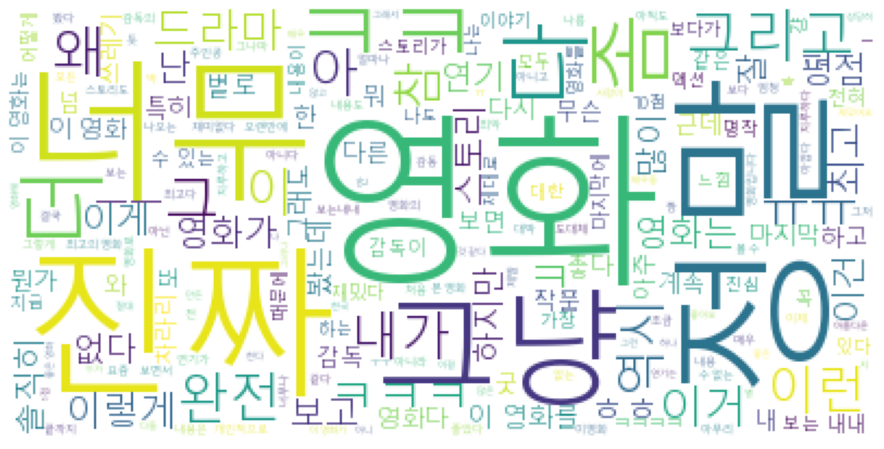

In [58]:
plt.figure(figsize=(20,8))
plt.imshow(cloud)
plt.axis("off") # x축,y축 끄기
plt.savefig("./naver_movie_wordcloud.jpg") # 그림저장
plt.show()

### 단어 유사도 분석
- gensim : word2vec, topic modeling등 텍스트마이닝 알고리즘이 구현된 라이브러리
- word2vec : 구글에서 발표한 단어 사이의 관계를 수치화하는 알고리즘

In [62]:
!pip install gensim

In [63]:
from gensim.models import Word2Vec

In [65]:
w2c = Word2Vec(window=5, # 중심단어를 기준으로 주변에 몇개단어까지 관계성을 학습할지
               min_count=5, # 전체 말뭉치의 최소 등장 빈도수 설정
                            #(최소빈도에 도달하지 못하면 학습단어로 사용x)
               sg=1, # 중심단어를 y 주변단어를 x로 설정하는 알고리즘(skip-gram)
               vector_size=100,# 한 개의 단어를 몇개의 숫자로 표현할건지
                              # 숫자가 커질수록 각 단어의 관계를 풍부하게 표현가능
               sentences=[doc.split(" ") for doc in text_train]) # 학습할 데이터 
                                

In [67]:
w2c.wv.get_vector("영화") # 영화를 표현하는 숫자(100개 숫자)

array([ 0.32293513,  0.14596094,  0.09917593,  0.5221072 , -0.03093977,
       -0.48029035,  0.22598532,  0.8860249 , -0.40027165, -0.31126446,
        0.19025053,  0.07680368, -0.14612465,  0.00145506,  0.25538847,
       -0.39534453, -0.23362896, -0.42204767, -0.16842291, -0.634002  ,
       -0.01232468,  0.00169302,  0.5307283 , -0.23821904,  0.1358427 ,
       -0.17754744,  0.08609504,  0.06087938, -0.11525982,  0.18518263,
        0.10070913, -0.3814565 ,  0.37259194, -0.526673  , -0.31664872,
        0.3160715 ,  0.02321221, -0.05622879, -0.28794765, -0.59324056,
       -0.3638889 , -0.16973329, -0.36666334, -0.1254303 , -0.11627335,
        0.06208237, -0.31870443,  0.39746374, -0.01350261,  0.5705154 ,
       -0.15473126, -0.11489008, -0.21783638, -0.02303033,  0.3149829 ,
       -0.04238675, -0.02181389, -0.20181072, -0.26039228,  0.24783973,
       -0.01566532,  0.07450285,  0.18806045, -0.37078553, -0.24881212,
        0.27621293,  0.29013106,  0.6756787 , -0.15274465,  0.29

In [77]:
w2c.wv.most_similar("마동석")

[('핸드폰', 0.9912754893302917),
 ('김창완', 0.9905059337615967),
 ('그리스', 0.9901632070541382),
 ('주연인데', 0.9900845289230347),
 ('저러면', 0.989460825920105),
 ('납니다', 0.9893221855163574),
 ('딴거', 0.9892950654029846),
 ('끝까지봄', 0.9892144799232483),
 ('으악', 0.9888824224472046),
 ('존니', 0.988853931427002)]

### 감성분석
- 감성사전을 이용한 분석
- 머신러닝을 이용한 분석
    1. 토큰화 진행
    2. BOW / tf-idf를 이용해 수치화(정형화)

#### BOW
- 문맥의 순서를 무시하고 단어의 빈도를 이용해 수치화하는 방법
- 문맥의 순서를 무시하기때문에 자연어처리에서는 부적합하다.
- 하지만 일반 텍스트마이닝에서는 충분히 활용 가치가 있다.

#### BOW 진행 순서
1. 단어사전 구축
2. 단어사전을 기반으로 각 문장에서 해당 단어가 등장하는 빈도를 측정

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

In [79]:
cv_test = CountVectorizer()

In [83]:
temp = ["안녕 나는 뽀로로야.",
        "오늘 점심은 뽀로로야.",
        "안녕 나는 오늘 점심에 뽀로로를 먹을꺼야.",
        "너는 오늘 나와 집에 같이 가자."]

In [84]:
# 단어사전 구축
# 영어 -> 대문자를 소문자로 변경, 1글자 제외, 띄어쓰기를 기준으로 토큰화
# 한글 -> 띄어쓰기를 기준으로 토큰화
cv_test.fit(temp)

CountVectorizer()

In [87]:
display(len(cv_test.vocabulary_)) # 등록된 단어의 갯수 확인
display(cv_test.vocabulary_)

13

{'안녕': 8,
 '나는': 2,
 '뽀로로야': 7,
 '오늘': 9,
 '점심은': 11,
 '점심에': 10,
 '뽀로로를': 6,
 '먹을꺼야': 5,
 '너는': 4,
 '나와': 3,
 '집에': 12,
 '같이': 1,
 '가자': 0}

In [89]:
# 단어빈도를 측정한 수치화
cv_test.transform(temp)

<4x13 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [90]:
cv_test.transform(temp).toarray()

array([[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

#### 학습 데이터 구성

In [91]:
naver_movie_cv = CountVectorizer()
naver_movie_cv.fit(text_train) # 단어사전 구축
X_train = naver_movie_cv.transform(text_train) # 빈도기반의 수치화
X_test = naver_movie_cv.transform(test['document'])

In [92]:
y_train = train['label'] # 0 : 부정,  1 : 긍정
y_test = test['label']

In [93]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(149995, 293366) (149995,)
(49997, 293366) (49997,)


#### 모델링

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [95]:
logi_model = LogisticRegression()

In [98]:
rs = cross_val_score(logi_model, X_train, y_train, cv = 3)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [99]:
rs

array([0.81111622, 0.80545222, 0.80879235])

In [101]:
# 학습 및 예측
logi_model.fit(X_train,y_train)
sample_reivews = ["이 영화는 이제껏 보여줬고 보여줘야했던 토르의 인생이 얼마나 굴곡지고 외롭고 가슴 아픈지를 아주 가벼운 연출로 보여주면서 그 슬픔을 희석 시켜줍니다. 만약 이 내용을 아주 진지하게 그려냈다면 보다가 중간에 포기했을 것 같아요. 제인과 토르의 이야기도 발키리의 개인 서사도 잘 다뤄주면서 동시에 토르가 처한 상황과 그가 잃은 것들이 얼마나 많고 그게 얼마나 슬픈 것인지도 보여줍니다. 그러면서 마지막엔 희망을 이야기하기까지 합니다. 히어로물이라는 장르를 사랑한 이유가 바로 이 마지막때문인데 그런 면에서 아주 좋았습니다.",
                  "스토리 전개가 그냥 이상하고 다 끊기는 느낌 이거 재밌다는 사람들 부럽다 온세상이 재밌을 듯 토르3 때문에 믿었는데 올해 최고의 믿는 도끼였다",
                  "너무 재밌어요 여러분 영화관 가면 꼭 보시길 바랍니다 제발요 돈 내고 보세요",
                  "솔직히 이번꺼는 마블 의리로 봄 중간에 몇번 나가고 싶었는데 걍 마블이라 다음 시리즈들도 봐야 하니까 끝까지 봄 웃긴거는 웃긴 요소들은 분명 많은데 전체적인 스토리라던지 그런게 개인적으론 유치하고 딱히 재미없었음.....",
                  "난 배우들이 좋아하는배우들이라 아주 간지나고신나고재밌었음"
                 ]
sample_transform = naver_movie_cv.transform(sample_reivews) # 정형화작업
pre = logi_model.predict_proba(sample_transform) # 확률값 예측

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
pre

array([[0.00168672, 0.99831328],
       [0.92943152, 0.07056848],
       [0.1357069 , 0.8642931 ],
       [0.99874932, 0.00125068],
       [0.57898204, 0.42101796]])

#### 학습된 단어(토큰)별 가중치 확인

In [105]:
naver_coef = logi_model.coef_[0]
len(naver_coef)

293366

In [107]:
naver_vocab = naver_movie_cv.vocabulary_
len(naver_vocab)

293366

In [109]:
print(naver_coef[0])
naver_vocab

0.5269811550495881


{'더빙': 71119,
 '진짜': 246232,
 '짜증나네요': 248358,
 '목소리': 99567,
 '포스터보고': 273335,
 '초딩영화줄': 255126,
 '오버연기조차': 190112,
 '가볍지': 16352,
 '않구나': 167602,
 '너무재밓었다그래서보는것을추천한다': 57394,
 '교도소': 33783,
 '이야기구먼': 208071,
 '솔직히': 145795,
 '재미는': 222295,
 '없다': 177352,
 '평점': 271982,
 '조정': 234711,
 '사이몬페그의': 133947,
 '익살스런': 210575,
 '연기가': 181881,
 '돋보였던': 74028,
 '영화': 185057,
 '스파이더맨에서': 150442,
 '늙어보이기만': 63331,
 '했던': 283593,
 '커스틴': 261359,
 '던스트가': 71680,
 '너무나도': 56734,
 '이뻐보였다': 207059,
 '걸음마': 25696,
 '3세부터': 5282,
 '초등학교': 254957,
 '1학년생인': 3039,
 '8살용영화': 7674,
 'ㅋㅋㅋ': 13347,
 '별반개도': 117898,
 '아까움': 160393,
 '원작의': 198609,
 '긴장감을': 43582,
 '제대로': 232430,
 '살려내지못했다': 134933,
 '반개도': 110754,
 '아깝다': 160496,
 '욕나온다': 194727,
 '이응경': 209070,
 '길용우': 43801,
 '연기생활이몇년인지': 182309,
 '정말': 230402,
 '발로해도': 112228,
 '그것보단': 36866,
 '낫겟다': 53960,
 '납치': 53930,
 '감금만반복반복': 18635,
 '이드라마는': 204973,
 '가족도없다': 17264,
 '연기못하는사람만모엿네': 182260,
 '액션이': 171312,
 '없는데도': 177305,
 '재미': 222156,
 '있는': 2148

In [117]:
# vocab 정렬하기
import pandas as pd
df = pd.DataFrame([naver_vocab.keys(), naver_vocab.values()],
                 index=["단어","인덱스"]).T.sort_values(by="인덱스").set_index("인덱스")
# vocab과 가중치 결합
df['가중치'] = naver_coef
df

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,단어,가중치
인덱스,,
0,00,0.526981
1,000,0.001849
2,0000000000000000,-0.355142
3,00000000000000000000000000000을달라,-0.355142
4,000000000000000001개짜리,-0.146916
...,...,...
293361,힣히히헤ㅎ,0.215878
293362,盧미오,0.344956
293363,綠林의,-0.147946


In [118]:
# 가중치를 중심으로 정렬 -> 상위 30, 하위 30개 단어 추출
df.sort_values(by="가중치", inplace=True, ascending=False)
top30 = df.head(30)
bottom30 = df.tail(30)

In [119]:
top30

,단어,가중치
인덱스,,
223318,재미있어요,3.302126
256234,최고다,3.056284
1057,10점준다,2.982827
237604,좋았어요,2.913059
180158,여운이,2.912191
223399,재미있었어요,2.882587
224745,재밌음,2.878498
146930,수작,2.838434
224446,재밌어요,2.779131


In [120]:
bottom30

,단어,가중치
인덱스,,
117645,별로네요,-2.568550
244071,지루함,-2.578724
222595,재미없네,-2.581418
166105,안보는게,-2.595552
244211,지루했다,-2.602282
220713,잤다,-2.604885
160,0점,-2.607420
222602,재미없네요,-2.614865
159205,쓰레기다,-2.616445


<AxesSubplot:xlabel='단어'>

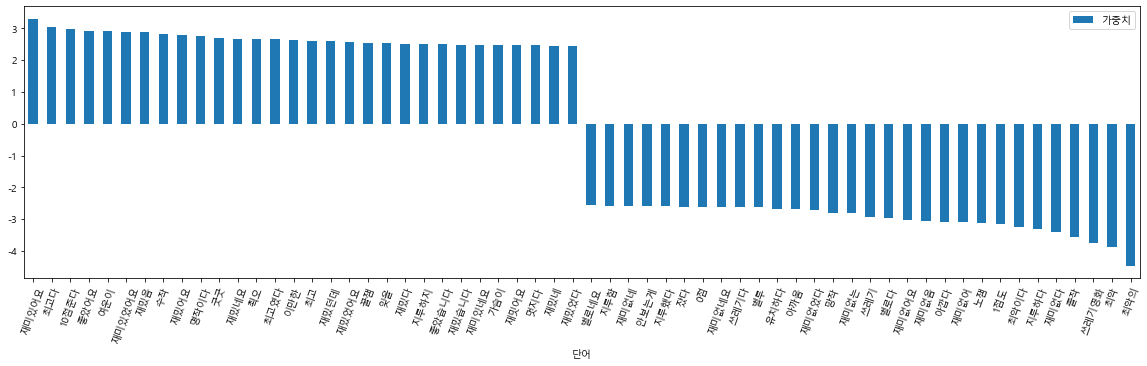

In [132]:
# 한글로 출력하기 위해서 폰트 지정하기!
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

# 마이너스 나오게하기
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# 시각화
main_words = pd.concat([top30,bottom30])
main_words.set_index("단어").plot(kind='bar',
                                 figsize=(20,5),
                                 rot=70)